# Master Notebook 

In [1]:
### Imports
from Import_csv_instance import instancia_csv
from GA_Genetic_algorithm import Genetic_Algorithm
from Solution_visualizer import solution_visualize
from Evolution_statistical_analysis import evolution_statistical_analysis

In [2]:
instancia = instancia_csv("instances/i1.csv")

Carregando Arquivo CSV instances/i1.csv
['Cirurgia (c)', 'Prioridade (p)', 'Dias_espera (w)', 'Especialidade (e)', 'Cirurgião (h)', 'Duração (tc)']
# randomFit_r2_s15_t8-4
# RandomFit: Escala três urgências para cada sala
# 2 salas. 15 cirurgias (6 urgencias)
# Duração das cirurgias segundo distribuição normal com media 8 e desvio 4 (minimo e 2 e maximo 22)
# Todas as cirurgias de prioridade 1 cabem no dia 1


## Parâmetros

In [3]:
Rooms       = 2
Instancia = (instancia, Rooms)

In [4]:
## Configuração da população inicial, 
greedy_pop   = 20 # greedy -> resultado do guloso.
random_pop   = 10 # sample aleatório.

pop_inicial  = (greedy_pop, random_pop)
# Cortes por geração 
elite_cut    = 0.1 # elite são os melhores fitness
lucky_cut    = 0.3 # lucky são os outros

gen_cuts     = (elite_cut, lucky_cut)
## Parametros do crossover
α            = 0.9  # Probabilidade de Crossover
cut_type     = "ONE_CUT" # tipo de corte ONE_CUT or MULTI_CUT 

cross_params = (α, cut_type)
## Parametros da mutação
β = 0.05 # Probabilidade de escolher tal filho para mutar;

mutation_params = (β)
## Criterios de parada:
generations = 100    # Max_iter

stop_len = 10 # quantas iterações seguidas
K        = 8  # a media das K melhores 
tol      = 1  # tem q estar a uma distancia tol do melhor 

In [5]:
set_params = [pop_inicial, gen_cuts, cross_params, mutation_params]
set_stop_criteria = [generations, stop_len, K, tol]

## Resultados

In [6]:
%time Evo, Evo_Scores = Genetic_Algorithm(Instancia, set_params, set_stop_criteria, Verbose = False)
print(" ")
L = solution_visualize(Evo[-1][-1], instancia)

 
 Algoritmo encerrou devido ao criterio de parada mágico 
 
CPU times: user 81.7 ms, sys: 0 ns, total: 81.7 ms
Wall time: 80.4 ms
 
calculando o número de dias da solução
O numero de dias são 2 o de salas são 2
[[1, 1, 1, 1, 1, 1, 1, -1, -1, 4, 4, -1, -1, 10, 10, 10, 10, 10, 10, 10, 10, -1, -1, 11, 11, 11, 11, 11, -1, -1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, -2], [2, 2, 2, 2, 2, 2, -1, -1, 3, 3, 3, 3, 3, 3, -1, -1, 5, 5, -1, -1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, -1, -1, 8, 8, -1, -1, 14, 14, 14, 14, 14, 14, -2]]
[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, -1, -1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, -2], [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, -1, -1, 15, 15, 15, 15, -2]]
 
 O Valor da Função objetivo é de: 260870
 Legenda: 
-2 significa final do turno na sala, naquele dia.
-1 significa intervalo entre as duas cirurgias.
 
 No dia 1:
 Tivemos na sala 1: 42
 Tivemos na sala 2: 45
 No dia 2:
 Tivemos na sala 1: 25
 Tivemos na sala 2: 16


# Analise da Evolução

 
 O Algoritmo levou 23 iterações.
 


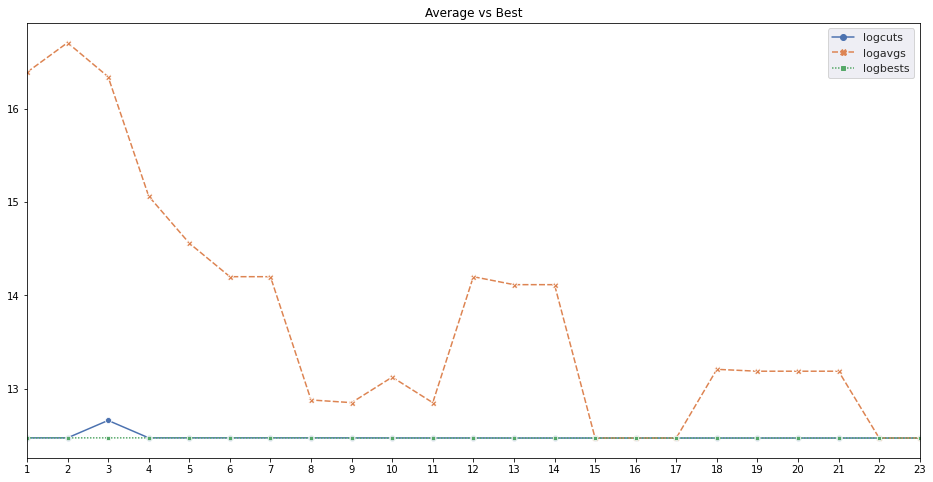

In [7]:
cut_avgs, bests = evolution_statistical_analysis(Evo_Scores, K-2)